In [1]:
import os

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}',")

There are 2 directories and 0 images in pizza_steak',
There are 2 directories and 0 images in pizza_steak\test',
There are 0 directories and 250 images in pizza_steak\test\pizza',
There are 0 directories and 250 images in pizza_steak\test\steak',
There are 2 directories and 0 images in pizza_steak\train',
There are 0 directories and 750 images in pizza_steak\train\pizza',
There are 0 directories and 750 images in pizza_steak\train\steak',


In [2]:
import pathlib
import numpy as np

data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    
    random_image=random.sample(os.listdir(target_folder),1)
    
    img=mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    
    print(f"Image shape: {img.shape}")
    
    return img

Image shape: (512, 512, 3)


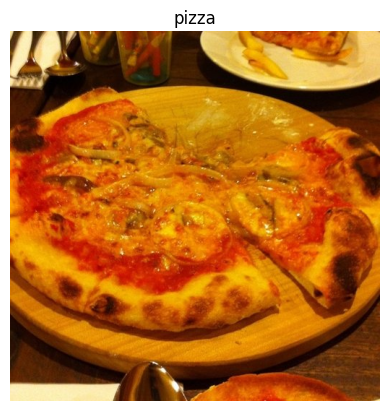

In [4]:
img=view_random_image('pizza_steak/train/','pizza')

In [5]:
import tensorflow as tf
img=tf.constant(img)
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[255, 245, 173],
        [246, 227, 159],
        [248, 230, 168],
        ...,
        [203, 158,  93],
        [172, 126,  66],
        [148, 102,  42]],

       [[255, 239, 167],
        [251, 232, 164],
        [244, 226, 164],
        ...,
        [228, 183, 116],
        [204, 159,  94],
        [186, 141,  76]],

       [[255, 237, 165],
        [252, 233, 165],
        [235, 215, 154],
        ...,
        [244, 200, 125],
        [233, 189, 116],
        [223, 179, 106]],

       ...,

       [[251, 235, 173],
        [250, 234, 172],
        [249, 233, 171],
        ...,
        [168, 128,  59],
        [184, 145,  78],
        [201, 164,  94]],

       [[255, 237, 175],
        [253, 235, 173],
        [250, 234, 172],
        ...,
        [234, 197, 126],
        [250, 216, 145],
        [255, 227, 155]],

       [[255, 238, 176],
        [254, 236, 174],
        [251, 235, 173],
        ...,
        [255, 233, 16

In [6]:
img/255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[1.        , 0.9607843 , 0.6784314 ],
        [0.9647059 , 0.8901961 , 0.62352943],
        [0.972549  , 0.9019608 , 0.65882355],
        ...,
        [0.79607844, 0.61960787, 0.3647059 ],
        [0.6745098 , 0.49411765, 0.25882354],
        [0.5803922 , 0.4       , 0.16470589]],

       [[1.        , 0.9372549 , 0.654902  ],
        [0.9843137 , 0.9098039 , 0.6431373 ],
        [0.95686275, 0.8862745 , 0.6431373 ],
        ...,
        [0.89411765, 0.7176471 , 0.45490196],
        [0.8       , 0.62352943, 0.36862746],
        [0.7294118 , 0.5529412 , 0.29803923]],

       [[1.        , 0.92941177, 0.64705884],
        [0.9882353 , 0.9137255 , 0.64705884],
        [0.92156863, 0.84313726, 0.6039216 ],
        ...,
        [0.95686275, 0.78431374, 0.49019608],
        [0.9137255 , 0.7411765 , 0.45490196],
        [0.8745098 , 0.7019608 , 0.41568628]],

       ...,

       [[0.9843137 , 0.92156863, 0.6784314 ],
        [0.98

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# set up path
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

# import data from directory
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

# building the model
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 370ms/step - loss: 0.6116 - accuracy: 0.6567 - val_loss: 0.4579 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 4s 90ms/step - loss: 0.4667 - accuracy: 0.7887 - val_loss: 0.4005 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 4s 90ms/step - loss: 0.4403 - accuracy: 0.8007 - val_loss: 0.4518 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 4s 95ms/step - loss: 0.4172 - accuracy: 0.8073 - val_loss: 0.3703 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.3688 - accuracy: 0.8467 - val_loss: 0.3339 - val_accuracy: 0.8540


In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [9]:
# checking for previous we build

tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_2=model_2.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 97ms/step - loss: 1.5624 - accuracy: 0.6607 - val_loss: 0.6352 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6896 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 91ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 91ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000


In [10]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_3=model_3.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 92ms/step - loss: 31.6038 - accuracy: 0.5873 - val_loss: 6.6857 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 4s 91ms/step - loss: 3.4722 - accuracy: 0.6573 - val_loss: 3.3124 - val_accuracy: 0.5980
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 2.1946 - accuracy: 0.7173 - val_loss: 0.6327 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 4s 92ms/step - loss: 1.1909 - accuracy: 0.6867 - val_loss: 0.8742 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 4s 92ms/step - loss: 0.5166 - accuracy: 0.7907 - val_loss: 0.5135 - val_accuracy: 0.7560


In [12]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 50)                7526450   
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,529,051
Trainable params: 7,529,051
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 384, 3)
Image shape: (512, 384, 3)


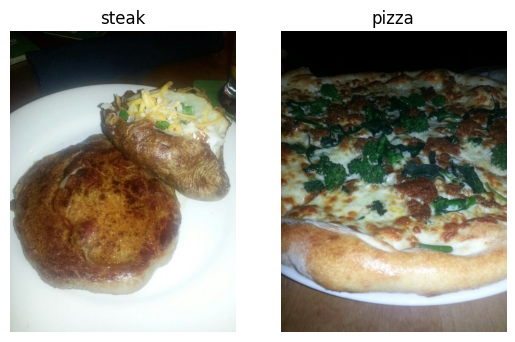

In [13]:
# 1 visualize
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('pizza_steak/train/','pizza')

In [14]:
# 2 define directory dataset path

train_dir='pizza_steak/train/'
test_dir="pizza_steak/test/"

In [15]:
# create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/225.)
test_datagen=ImageDataGenerator(rescale=1/225.)

In [16]:
# load in our image data from directories and turn them into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [18]:
len(train_data)

47

In [19]:
1500/32

46.875

In [20]:
images[:2],images[0].shape

(array([[[[0.53333336, 0.46222222, 0.39111114],
          [0.5511111 , 0.48000002, 0.4088889 ],
          [0.5511111 , 0.49333334, 0.42222223],
          ...,
          [0.9377778 , 0.8088889 , 0.5511111 ],
          [0.95555556, 0.83555555, 0.6       ],
          [0.9955556 , 0.88      , 0.66222227]],
 
         [[0.5777778 , 0.48444447, 0.4088889 ],
          [0.5733333 , 0.48000002, 0.40444446],
          [0.5822222 , 0.50222224, 0.41333336],
          ...,
          [0.9377778 , 0.8       , 0.5466667 ],
          [0.9377778 , 0.8044445 , 0.5644445 ],
          [0.95555556, 0.83111113, 0.6088889 ]],
 
         [[0.59555554, 0.48444447, 0.39555556],
          [0.6088889 , 0.4977778 , 0.4088889 ],
          [0.6088889 , 0.51111114, 0.4088889 ],
          ...,
          [0.9377778 , 0.7955556 , 0.54222226],
          [0.9377778 , 0.8       , 0.5555556 ],
          [0.9466667 , 0.81333333, 0.5822222 ]],
 
         ...,
 
         [[0.88      , 0.64      , 0.3288889 ],
          [0.88   

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Activation
from tensorflow.keras.models import Sequential

In [22]:
# creating the model
model_4=Sequential([
    Conv2D(filters=10, # no of sliding window going across the input(higher= more complex model) 
           kernel_size=3, # size of sliding window going across the input
           strides=1, # size of step the sliding window takes across the input
           padding='valid', # if 'same' output shape is same as input, if 'valid' output shape get compressed
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 103ms/step - loss: 0.7589 - accuracy: 0.6367 - val_loss: 0.5761 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 4s 92ms/step - loss: 0.4834 - accuracy: 0.7893 - val_loss: 0.4072 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 0.3529 - accuracy: 0.8453 - val_loss: 0.3927 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 4s 93ms/step - loss: 0.1851 - accuracy: 0.9407 - val_loss: 0.4175 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.0695 - accuracy: 0.9813 - val_loss: 0.4085 - val_accuracy: 0.8360


In [23]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 66ms/step - loss: 0.3577 - accuracy: 0.8560


[0.3577374219894409, 0.8560000061988831]

In [24]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 65ms/step - loss: 0.4166 - accuracy: 0.8220


[0.41662466526031494, 0.8220000267028809]

<Axes: >

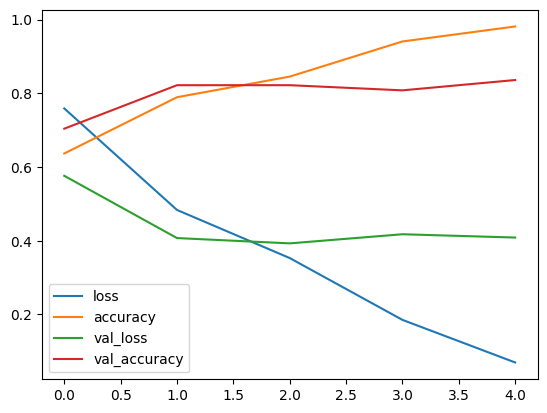

In [25]:
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [20]:
def plot_loss_curve(history):
    
    loss= history.history['loss']
    val_loss=history.history['val_loss']
    
    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']
    
    epochs=range(len(history.history['loss']))
    
    plt.plot(epochs,loss,label='training loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs,accuracy,label='accuracy')
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title('accuracy')
    plt.ylabel('epochs')
    plt.legend()

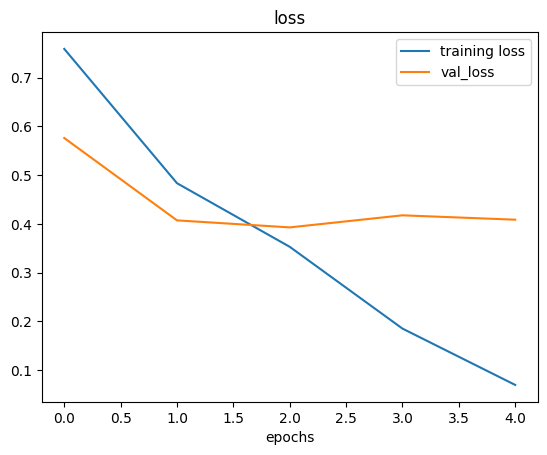

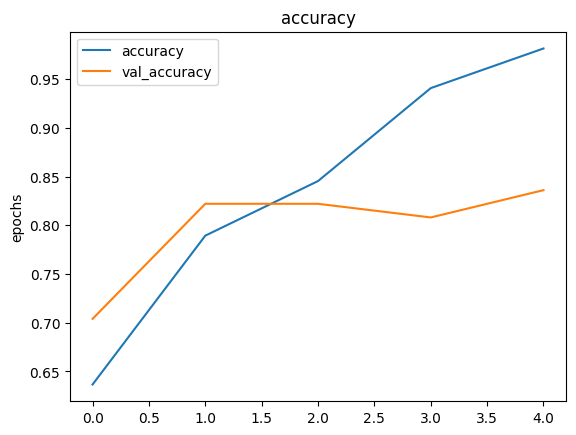

In [27]:
plot_loss_curve(history_4)

In [28]:
# building a model again
tf.random.set_seed(42)

model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5=model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 98ms/step - loss: 0.6031 - accuracy: 0.6727 - val_loss: 0.4427 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 4s 90ms/step - loss: 0.4682 - accuracy: 0.7887 - val_loss: 0.4448 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4486 - accuracy: 0.8067 - val_loss: 0.4208 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4205 - accuracy: 0.8087 - val_loss: 0.3905 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.3985 - accuracy: 0.8280 - val_loss: 0.3897 - val_accuracy: 0.8340


In [29]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 65ms/step - loss: 0.4068 - accuracy: 0.8140


[0.4067538380622864, 0.8140000104904175]

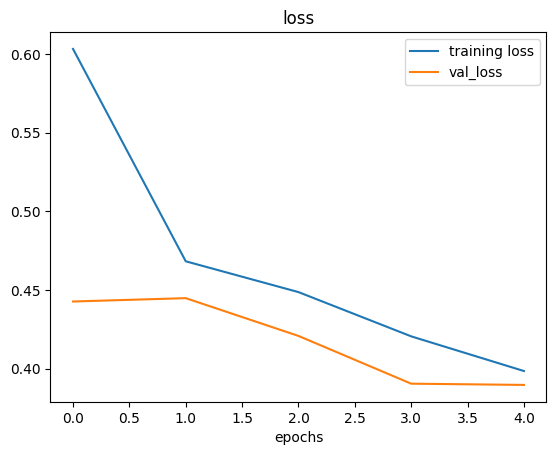

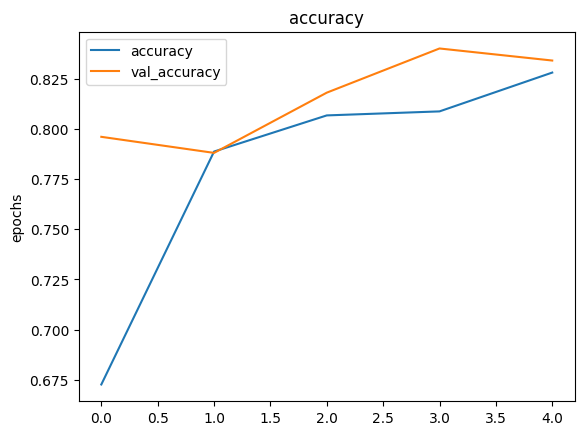

In [30]:
plot_loss_curve(history_5)

In [31]:
# create ImageDataGenerator instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/225.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)

# create ImageDataGenerator instance without data augmentation
train_datagen=ImageDataGenerator(rescale=1/225.)

# create Imagedatagenerator instance without data augmentation for test data set
test_datagen=ImageDataGenerator(rescale=1/225.)

In [32]:
# import data and augment it and make batches
print('Augmented training data')
train_data_aug=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                           batch_size=32,
                                                           target_size=(224,224),
                                                           class_mode='binary', 
                                                           shuffle=False)
# make non-augmented batches for train data
print('non-augmented taining data')
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary',
                                            shuffle=False)

# create non-augmented batches for test data
print('non-augmented test data')
test_data=test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented taining data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


In [33]:
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_aug.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


showing image number 10


(-0.5, 223.5, 223.5, -0.5)

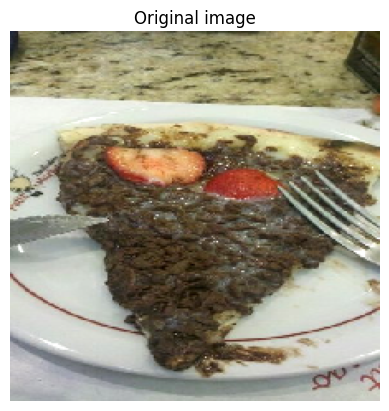

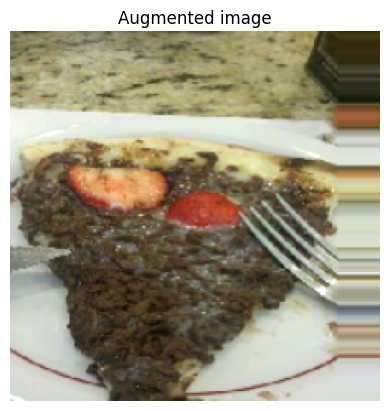

In [34]:
import random

random_number=random.randint(0,32)
print('showing image number',random_number)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [35]:
# creating model for augmented data set
model_6=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_6=model_6.fit(train_data_aug,
                     epochs=5,
                      steps_per_epoch=len(train_data_aug),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
                     )

Epoch 1/5
47/47 [==============================] - 14s 296ms/step - loss: 0.9598 - accuracy: 0.4033 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 14s 293ms/step - loss: 0.6974 - accuracy: 0.5400 - val_loss: 0.6866 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 14s 290ms/step - loss: 0.6908 - accuracy: 0.6013 - val_loss: 0.6753 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 14s 291ms/step - loss: 0.6803 - accuracy: 0.6620 - val_loss: 0.6553 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 14s 292ms/step - loss: 0.6968 - accuracy: 0.5573 - val_loss: 0.6599 - val_accuracy: 0.5740


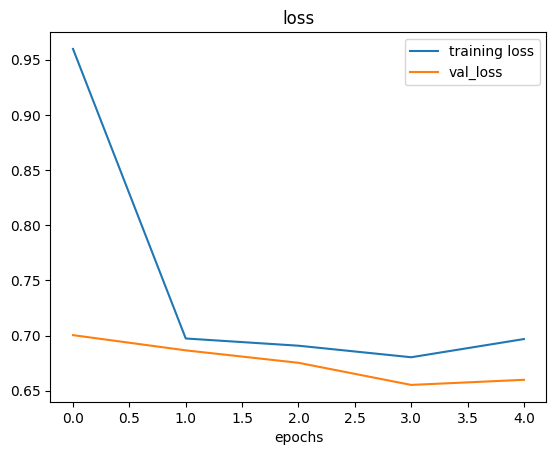

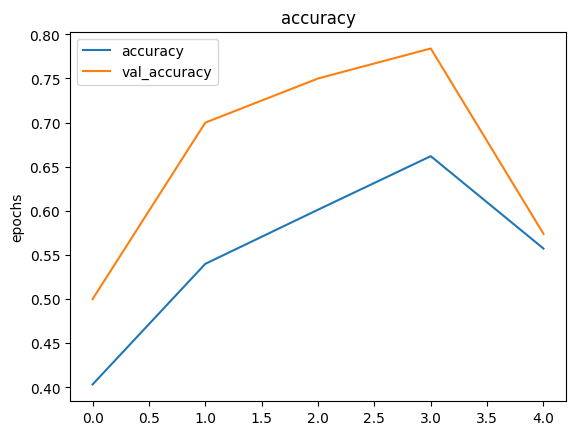

In [36]:
plot_loss_curve(history_6)

In [37]:
train_data_aug_and_shuffle=train_datagen_augmented.flow_from_directory(train_dir,
                                                                       target_size=(224,224),
                                                                       batch_size=32,
                                                                       class_mode='binary',
                                                                       shuffle=True
                                                                      )

Found 1500 images belonging to 2 classes.


In [38]:
# again creating model 😮‍💨😮‍💨
model_7=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history_7=model_7.fit(train_data_aug_and_shuffle,
                     epochs=5,
                      steps_per_epoch=len(train_data_aug_and_shuffle),
                      validation_data=test_data,
                      validation_steps=len(test_data)
                     )

Epoch 1/5
47/47 [==============================] - 15s 297ms/step - loss: 0.6686 - accuracy: 0.5700 - val_loss: 0.6032 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.6078 - accuracy: 0.6687 - val_loss: 0.5186 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 14s 291ms/step - loss: 0.5570 - accuracy: 0.7220 - val_loss: 0.4572 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 18s 375ms/step - loss: 0.5269 - accuracy: 0.7407 - val_loss: 0.4292 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 14s 296ms/step - loss: 0.5104 - accuracy: 0.7500 - val_loss: 0.4451 - val_accuracy: 0.8200


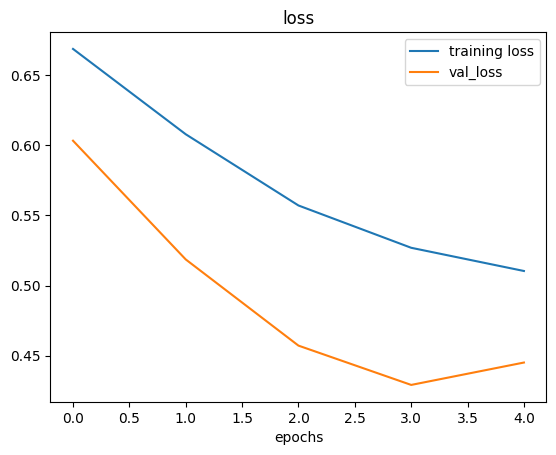

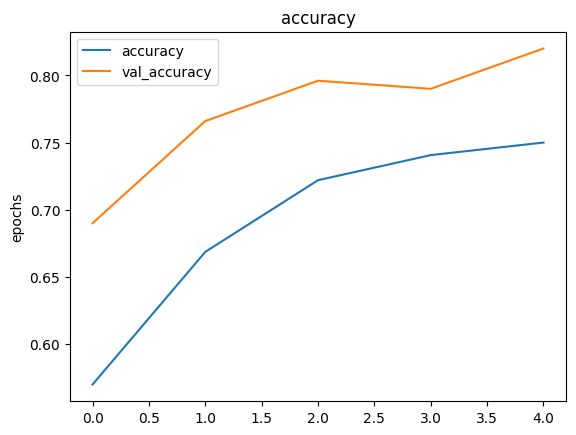

In [39]:
plot_loss_curve(history_7)

(-0.5, 1199.5, 803.5, -0.5)

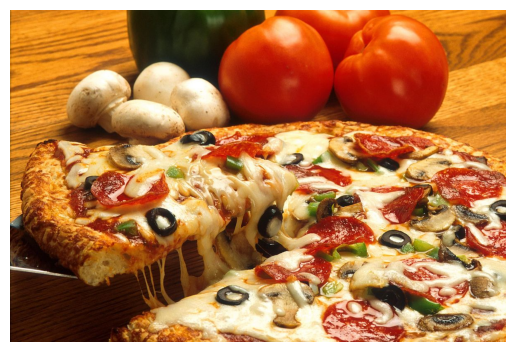

In [66]:
steak=mpimg.imread('Pizza_(1).jpg')
plt.imshow(steak)
plt.axis(False)

In [67]:
steak.shape

(804, 1200, 3)

In [68]:
steak

array([[[122,  59,   0],
        [191, 125,  29],
        [204, 130,  31],
        ...,
        [229, 124,  17],
        [231, 126,  21],
        [232, 127,  22]],

       [[133,  70,   0],
        [201, 135,  39],
        [213, 139,  40],
        ...,
        [237, 132,  25],
        [238, 133,  26],
        [239, 134,  27]],

       [[139,  76,   0],
        [205, 139,  43],
        [215, 141,  42],
        ...,
        [234, 130,  19],
        [234, 129,  20],
        [235, 130,  21]],

       ...,

       [[ 19,   1,   0],
        [ 31,  12,   6],
        [ 47,  20,  13],
        ...,
        [238, 145,  42],
        [247, 154,  59],
        [240, 147,  54]],

       [[ 17,   0,   0],
        [ 29,  10,   4],
        [ 45,  18,  11],
        ...,
        [226, 133,  30],
        [238, 145,  50],
        [236, 143,  50]],

       [[ 16,   0,   0],
        [ 29,  10,   4],
        [ 46,  19,  12],
        ...,
        [212, 119,  16],
        [224, 131,  36],
        [229, 136,  43]]

In [35]:
# create a function to import an image and resize it to fit for model
def load_and_prep_image(filename,img_shape=224):
    '''
    Read an image from filename, turn it into a tensor and reshape
    '''
    # read in the image
    img=tf.io.read_file(filename)
    # decode the read file into a tensor
    img=tf.image.decode_image(img)
    # resize the image
    img=tf.image.resize(img,size=[img_shape,img_shape])
    # rescale the image 
    img=img/255.
    return img

In [70]:
# load in and preprocess our custom image
steak=load_and_prep_image('Pizza_(1).jpg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8404061 , 0.54530805, 0.15287115],
        [0.9305572 , 0.5344788 , 0.08377852],
        [0.89164793, 0.5347852 , 0.11517732],
        ...,
        [0.9389868 , 0.5546731 , 0.064477  ],
        [0.93367594, 0.5444824 , 0.06225847],
        [0.9141807 , 0.514387  , 0.08074596]],

       [[0.83876055, 0.5436625 , 0.15122549],
        [0.9161002 , 0.527446  , 0.08966462],
        [0.85323507, 0.4963723 , 0.07676446],
        ...,
        [0.9660087 , 0.57467854, 0.08592396],
        [0.9432801 , 0.5550448 , 0.05280442],
        [0.9138544 , 0.524171  , 0.05433055]],

       [[0.762465  , 0.47029188, 0.07394457],
        [0.8727891 , 0.5012693 , 0.07416841],
        [0.8464523 , 0.49766532, 0.0671331 ],
        ...,
        [0.91826624, 0.53480446, 0.06936315],
        [0.9284306 , 0.5597403 , 0.08171576],
        [0.89944255, 0.53448904, 0.08787157]],

       ...,

       [[0.18179272, 0.07591037, 0.04334693],
        [0.21

In [71]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 32ms/step


array([[0.59744567]], dtype=float32)

In [72]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [73]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [32]:
def pred_and_plot(model,filename,class_names=class_names):
    '''
    import an image located at filename, make a prediction with model
    and plot the image with the predicted class as the title
    '''
    
    # import the target image and preprocess it
    img= load_and_prep_image(filename)
    
    # make a prediction
    pred=model.predict(tf.expand_dims(img,axis=0))
    
    # get the prediction class
    pred_class=class_names[int(tf.round(pred))]
    
    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 33ms/step


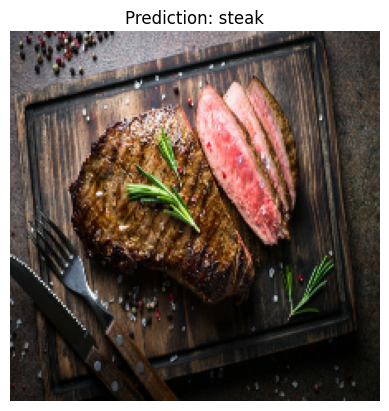

In [76]:
pred_and_plot(model_7,'steak_image1.jpg')

1/1 [==============================] - 0s 33ms/step


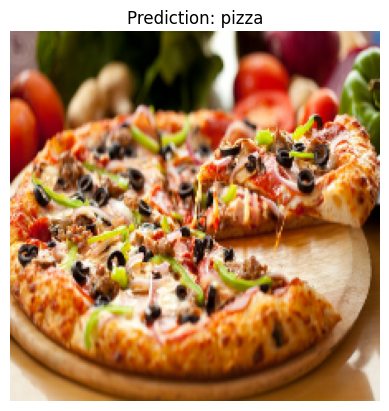

In [77]:
pred_and_plot(model_7,'pizza_2.jpg')

# Multi-class CNN model

In [2]:
# walk through the data
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

There are 2 directory and 0 images in '10_food_classes_all_data'.
There are 10 directory and 0 images in '10_food_classes_all_data\test'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directory and 250 images in '10_food_classes_all_data\test\sushi'.
There are 10 directory and 0 image

In [3]:
# setup train and test directories
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [4]:
# let get the class name
import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Image shape: (287, 512, 3)


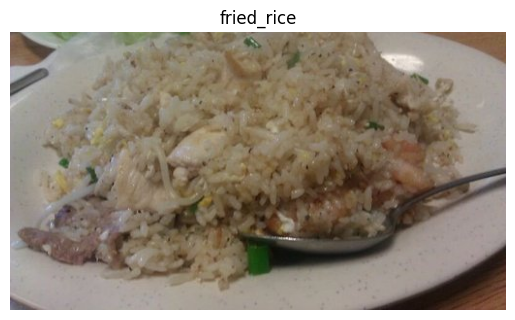

In [10]:
# visualise,visualise,visualise
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names)
                     )

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# load data in from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [16]:
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Activation,MaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Sequential

In [18]:
# creating a model
model_8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

history_8=model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 493ms/step - loss: 2.1841 - accuracy: 0.1853 - val_loss: 2.0001 - val_accuracy: 0.2920
Epoch 2/5
235/235 [==============================] - 21s 91ms/step - loss: 1.8886 - accuracy: 0.3403 - val_loss: 1.8866 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 20s 87ms/step - loss: 1.4863 - accuracy: 0.5051 - val_loss: 2.0214 - val_accuracy: 0.3308
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 0.8340 - accuracy: 0.7317 - val_loss: 2.5394 - val_accuracy: 0.2836
Epoch 5/5
235/235 [==============================] - 21s 90ms/step - loss: 0.3112 - accuracy: 0.9044 - val_loss: 3.6945 - val_accuracy: 0.2692


In [19]:
model_8.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 3.6945 - accuracy: 0.2692


[3.6944515705108643, 0.26919999718666077]

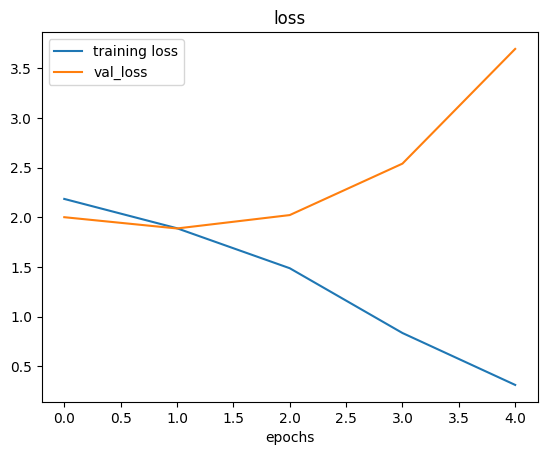

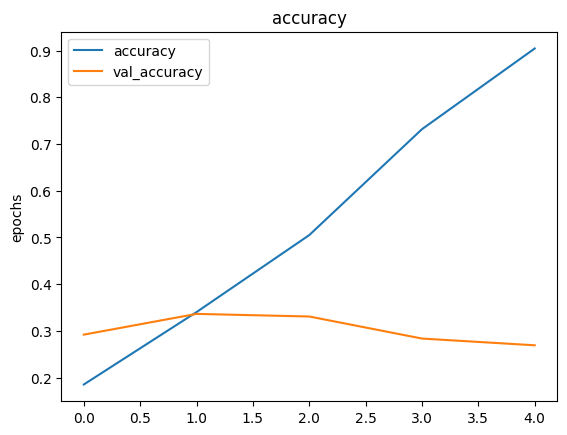

In [21]:
plot_loss_curve(history_8)

In [23]:
# try simple model
model_9= Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 23s 96ms/step - loss: 2.1160 - accuracy: 0.2355 - val_loss: 1.9749 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 21s 89ms/step - loss: 1.7952 - accuracy: 0.3840 - val_loss: 1.8806 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 21s 89ms/step - loss: 1.4919 - accuracy: 0.5151 - val_loss: 1.8901 - val_accuracy: 0.3620
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 1.0310 - accuracy: 0.6817 - val_loss: 2.0383 - val_accuracy: 0.3404
Epoch 5/5
235/235 [==============================] - 21s 88ms/step - loss: 0.5853 - accuracy: 0.8349 - val_loss: 2.4097 - val_accuracy: 0.3312


In [26]:
# augment the training data
train_datagen_augment=ImageDataGenerator(rescale=1/225.,
                                         rotation_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)

train_data_augment=train_datagen_augment.flow_from_directory(train_dir,
                                                          target_size=(224,224),
                                                          batch_size=32,
                                                          class_mode='categorical',
                                                          )

Found 7500 images belonging to 10 classes.


In [28]:
# clone the model
model_10= tf.keras.models.clone_model(model_8)

# compile
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_10=model_10.fit(train_data_augment,
                        epochs=5,
                        steps_per_epoch=len(train_data_augment),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 70s 295ms/step - loss: 2.2160 - accuracy: 0.1797 - val_loss: 2.0619 - val_accuracy: 0.2572
Epoch 2/5
235/235 [==============================] - 68s 289ms/step - loss: 2.0772 - accuracy: 0.2620 - val_loss: 1.9090 - val_accuracy: 0.3232
Epoch 3/5
235/235 [==============================] - 69s 292ms/step - loss: 2.0326 - accuracy: 0.2805 - val_loss: 1.8612 - val_accuracy: 0.3608
Epoch 4/5
235/235 [==============================] - 69s 294ms/step - loss: 1.9882 - accuracy: 0.3049 - val_loss: 1.9223 - val_accuracy: 0.3440
Epoch 5/5
235/235 [==============================] - 68s 288ms/step - loss: 1.9343 - accuracy: 0.3260 - val_loss: 1.8842 - val_accuracy: 0.3592


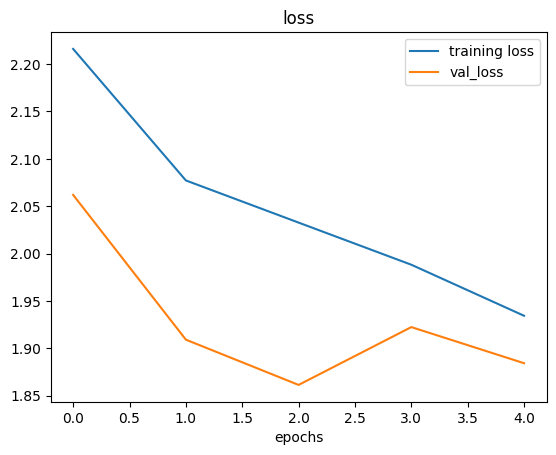

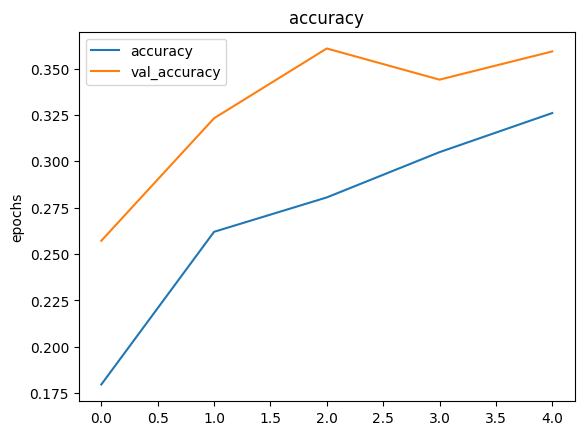

In [29]:
plot_loss_curve(history_10)

In [30]:
model_10.evaluate(test_data)

79/79 [==============================] - 5s 66ms/step - loss: 1.8842 - accuracy: 0.3592


[1.8841726779937744, 0.35920000076293945]

In [31]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [33]:
# reconfig the pred and plot method
def pred_and_plot(model,filename,class_names=class_names):
    '''
    import an image located at filename, make a prediction with model
    and plot the image with the predicted class as the title
    '''
    
    # import the target image and preprocess it
    img= load_and_prep_image(filename)
    
    # make a prediction
    pred=model.predict(tf.expand_dims(img,axis=0))
    
    # add logic to muliclass 
    if len(pred[0])>1:
        pred_class=class_names[tf.argmax(pred[0])]
    else:
        pred_class=class_names[int(tf.round(pred))]
    
    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 486ms/step


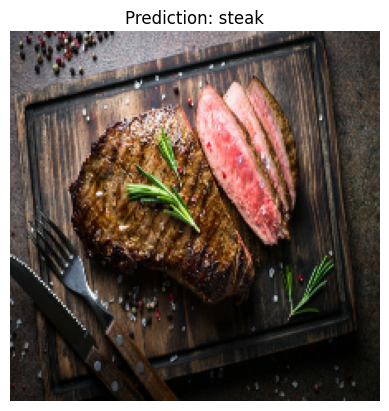

In [36]:
pred_and_plot(model_10,'steak_image1.jpg')

1/1 [==============================] - 0s 48ms/step


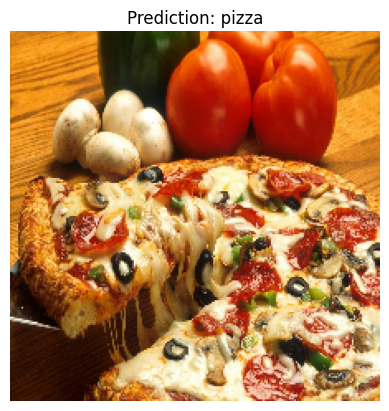

In [37]:
pred_and_plot(model_10,'Pizza_(1).jpg')

1/1 [==============================] - 0s 40ms/step


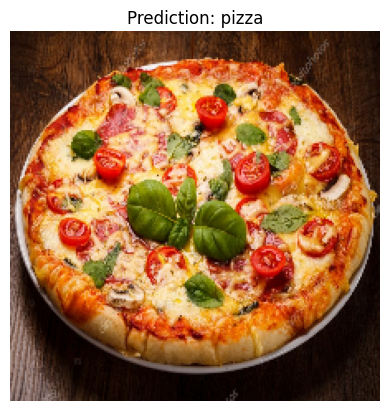

In [38]:
pred_and_plot(model_10,'pizza_3.jpg')

1/1 [==============================] - 0s 36ms/step


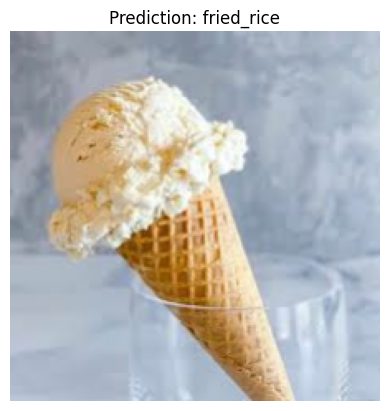

In [39]:
pred_and_plot(model_10,'ice_cream.jpeg')

1/1 [==============================] - 0s 42ms/step


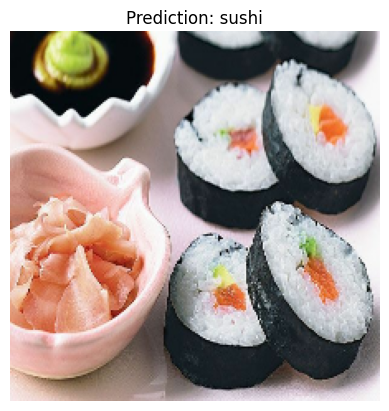

In [40]:
pred_and_plot(model_10,'sushi.jpg')

In [41]:
# save the model
model_10.save('saved_trained_model')

INFO:tensorflow:Assets written to: saved_trained_model\assets


INFO:tensorflow:Assets written to: saved_trained_model\assets


In [42]:
load_model_10=tf.keras.models.load_model('saved_trained_model')
load_model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                      

In [43]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                      